In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install cuss_inspect
!pip install detoxify
!pip install --upgrade nudenet
!pip install SpeechRecognition

     |████████████████████████████████| 30.9MB 147kB/s 
     |████████████████████████████████| 22.3MB 1.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 1.2MB 11.6MB/s 
     |████████████████████████████████| 2.0MB 19.7MB/s 
     |████████████████████████████████| 890kB 38.6MB/s 
     |████████████████████████████████| 3.2MB 43.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=fc79fb8aa578a0e93481c41a4b1efbdce428289a28d0f94abed4b36c06b53f8d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 4.1MB 11.9MB/s 
     |████████████████████████████████| 37.6MB 111kB/s 
     |████████████████████████████████| 32.8MB 128kB/s 


In [ ]:
from cuss_inspect import predict, predict_prob
from detoxify import Detoxify
import pandas as pd
from nudenet import NudeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from io import BytesIO
from PIL import Image  
import numpy as np
import cv2
import speech_recognition as sr
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
def is_toxic_text():
  comment = input("Enter the comment to check if it is toxic or not: ")
  print("Entered comment: ", comment)
  if (predict(comment)) == 1:
    print(color.BOLD + color.RED + color.UNDERLINE + "Toxic Text Detected" + color.END)
    print("Conducting deeper analysis...........")
    print("The text contains the following types of toxicity: ")
    
    results = Detoxify('unbiased').predict(comment)
    show = pd.DataFrame(results, index=[0]).round(5)
    if show['severe_toxicity'][0] > 0.50:
      print(color.BOLD + "Severe toxicity" + color.END)
    if show['obscene'][0] > 0.50:
      print(color.BOLD + "Obscene" + color.END)
    if show['identity_attack'][0] > 0.50:
      print(color.BOLD + "Identity attack" + color.END)
    if show['insult'][0] > 0.50:
      print(color.BOLD + "Insult" + color.END)
    if show['threat'][0] > 0.50:
      print(color.BOLD + "Threat" + color.END)
    if show['sexual_explicit'][0] > 0.50:
      print(color.BOLD + "Sexual Explicity" + color.END)    
    img = mpimg.imread("/content/drive/MyDrive/Hackathon/Data/Cyber Crime Portal.png")
    plt.figure(figsize=(20,10))
    plt.axis('off')
    imgplot = plt.imshow(img)
    print()
    print()
    print("To report this, please visit the National Cyber Crime Reporting Portal")
    plt.show()
    print(color.BLUE + color.UNDERLINE + "https://cybercrime.gov.in" + color.END)
  else:
    print(color.BOLD + color.UNDERLINE + "No toxicity detected" + color.END)

Enter the comment to check if it is toxic or not: you are an idiot
Entered comment:  you are an idiot
Toxic Text Detected
Conducting deeper analysis...........
The text contains the following types of toxicity: 
Insult


To report this, please visit the National Cyber Crime Reporting Portal


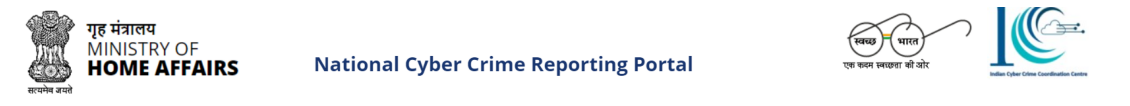

https://cybercrime.gov.in


In [ ]:
is_toxic_text()

In [ ]:
def is_nsfw_image():
  name = input("Enter file name: ")
  uploaded = files.upload()
  image = cv2.imread(name)
  classifier = NudeClassifier()
  result = classifier.classify(image)
  if np.float(result[0]['unsafe']) > 0.5:
    print(color.BOLD + color.RED + color.UNDERLINE + "Toxic image detected" + color.END)
    img = mpimg.imread("/content/drive/MyDrive/Hackathon/Data/Cyber Crime Portal.png")
    plt.figure(figsize=(20,10))
    plt.axis('off')
    imgplot = plt.imshow(img)
    print()
    print()
    print("To report this, please visit the National Cyber Crime Reporting Portal")
    print(color.BLUE + color.UNDERLINE + "https://cybercrime.gov.in" + color.END)
  else:
    print(color.BOLD + color.UNDERLINE + "No toxicity detected" + color.END)

Enter file name: test.jpeg


Saving test.jpeg to test.jpeg


MB100% (80.0 of 80.0) |##################| Elapsed Time: 0:00:02 Time:  0:00:02


Succefully Downloaded to: /root/.NudeNet/classifier_model.onnx
Toxic image detected


To report this, please visit the National Cyber Crime Reporting Portal
https://cybercrime.gov.in


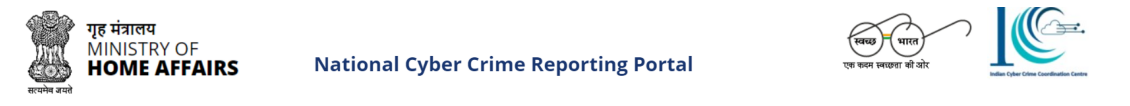

In [ ]:
is_nsfw_image()

In [ ]:
def is_nsfw_video():
  name = input("Enter file name: ")
  uploaded = files.upload()
  classifier = NudeClassifier()
  result = classifier.classify_video(name)

  ids = []
  for x in result['preds']:
    ids.append(x)

  prob = 1
  for id in ids:
    prob = prob*np.float(result['preds'][id]['unsafe'])

  if prob > 0.45:
    print(color.BOLD + color.RED + color.UNDERLINE + "Toxic frame(s) in video detected" + color.END)
    img = mpimg.imread("/content/drive/MyDrive/Hackathon/Data/Cyber Crime Portal.png")
    plt.figure(figsize=(20,10))
    plt.axis('off')
    imgplot = plt.imshow(img)
    print()
    print()
    print("To report this, please visit the National Cyber Crime Reporting Portal")
    print(color.BLUE + color.UNDERLINE + "https://cybercrime.gov.in" + color.END)
  else:
    print(color.BOLD + color.UNDERLINE + "No toxicity detected" + color.END)

In [ ]:
is_nsfw_video()

Enter file name: v.mp4


Saving v.mp4 to v.mp4
No toxicity detected


In [ ]:
def is_toxic_audio():
  name = input("Enter file name: ")
  uploaded = files.upload()
  r = sr.Recognizer()

  with sr.AudioFile(name) as source:    
      audio_text = r.listen(source)
      
      try:
          comment = r.recognize_google(audio_text)
      except:
          print('Sorry.. run again...')

  if (predict(comment)) == 1:
    print(color.BOLD + color.RED + color.UNDERLINE + "Toxic Text Detected" + color.END)
    print("Conducting deeper analysis...........")
    print("The text contains the following types of toxicity: ")
    
    results = Detoxify('unbiased').predict(comment)
    show = pd.DataFrame(results, index=[0]).round(5)
    if show['severe_toxicity'][0] > 0.50:
      print(color.BOLD + "Severe toxicity" + color.END)
    if show['obscene'][0] > 0.50:
      print(color.BOLD + "Obscene" + color.END)
    if show['identity_attack'][0] > 0.50:
      print(color.BOLD + "Identity attack" + color.END)
    if show['insult'][0] > 0.50:
      print(color.BOLD + "Insult" + color.END)
    if show['threat'][0] > 0.50:
      print(color.BOLD + "Threat" + color.END)
    if show['sexual_explicit'][0] > 0.50:
      print(color.BOLD + "Sexual Explicity" + color.END)    
    img = mpimg.imread("/content/drive/MyDrive/Life/Family/Cyber Crime Portal.png")
    plt.figure(figsize=(20,10))
    plt.axis('off')
    imgplot = plt.imshow(img)
    print()
    print()
    print("To report this, please visit the National Cyber Crime Reporting Portal")
    plt.show()
    print(color.BLUE + color.UNDERLINE + "https://cybercrime.gov.in" + color.END)
  else:
    print(color.BOLD + color.UNDERLINE + "No toxicity detected" + color.END)

In [ ]:
is_toxic_audio()

Enter file name: sample.wav


Saving sample.wav to sample.wav
No toxicity detected


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Spam words:


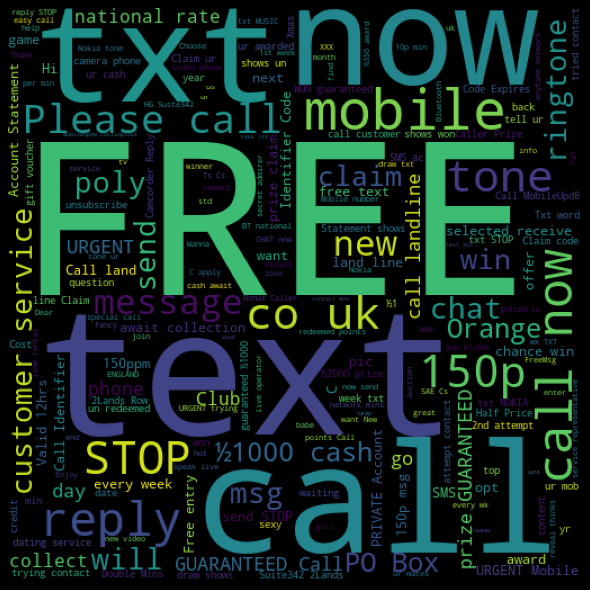

Not spam words:


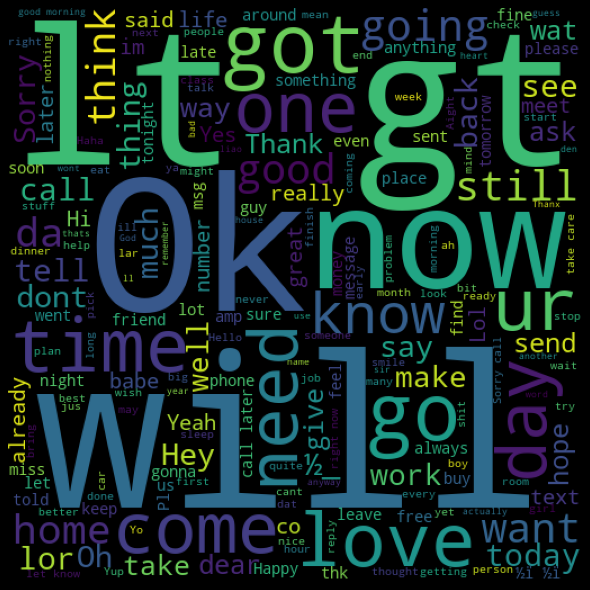

Training the 1st classifier and checking metrics:
Precision:  0.9014084507042254
Recall:  0.735632183908046
F-score:  0.810126582278481
Accuracy:  0.9563318777292577
Training the 2nd classifier and checking metrics:
Precision:  0.8974358974358975
Recall:  0.603448275862069
F-score:  0.7216494845360825
Accuracy:  0.9410480349344978


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re

mails = pd.read_csv("/content/drive/MyDrive/Hackathon/Data/spam.csv", encoding = 'latin-1')

mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
mails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.drop(['labels'], axis = 1, inplace = True)


totalMails = 4825 + 747
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)

testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)

spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
print(color.BOLD + "Spam words:" + color.END)
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
print(color.BOLD + "Not spam words:" + color.END)
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

  
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)


print("Training the 1st classifier and checking metrics:")
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

print("Training the 2nd classifier and checking metrics:")
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)

def is_potentially_fraud_sms():
  message = input("Copy and paste your text message here:")
  pm = process_message(message)
  result = sc_tf_idf.classify(pm)

  if result == True:
    print(color.BOLD + color.RED + "The text message is potentially fraud!" + color.END)
    img = mpimg.imread("/content/drive/MyDrive/Hackathon/Data/Cyber Crime Portal.png")
    plt.figure(figsize=(20,10))
    plt.axis('off')
    imgplot = plt.imshow(img)
    print()
    print()
    print("To report this, please visit the National Cyber Crime Reporting Portal")
    plt.show()
    print(color.BLUE + color.UNDERLINE + "https://cybercrime.gov.in" + color.END)
  else:
    print(color.BOLD + color.UNDERLINE + "The text message is not potentially fraud!" + color.END)

Copy and paste your text message here:please call at 410940942
The text message is potentially fraud!


To report this, please visit the National Cyber Crime Reporting Portal


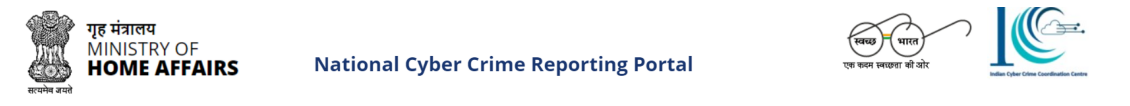

https://cybercrime.gov.in


In [ ]:
is_potentially_fraud_sms()

Visualizing the dataset description:
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]
----------------------------------------------------------------------------------------------------
Recall score for SVM:  0.8014705882352942

Plotting the ROC curve:


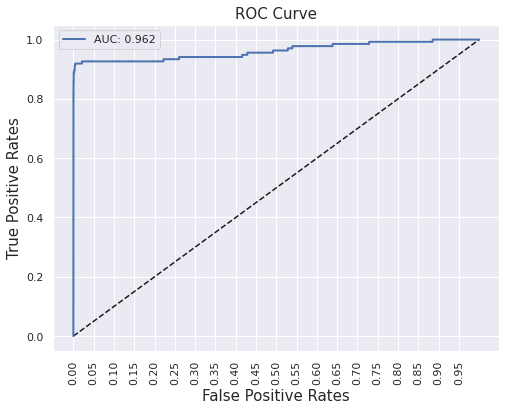

In [ ]:
%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

data = pd.read_csv("/content/drive/MyDrive/Hackathon/Data/creditcard.csv")
df = data.copy() # To keep the data as backup
df.head()

print("Visualizing the dataset description:")
print(df.describe())
print('-'*100)

df['Amount-Bins'] = ''

def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

bins, bin_labels = make_bins(df.Amount, size=10)

df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)

df['Amount-Bins'].head().to_frame()

df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

X = df.drop(labels='Class', axis=1)
Y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=100, test_size=0.3, shuffle=True)

mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)


def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    plt.show()

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(xtrainS, ytrainS)
svc_pred = svc_model.predict(xtestS)
svc_recall = recall_score(ytestS, svc_pred)
print("Recall score for SVM: ", svc_recall)

svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]

svc_auc = roc_auc_score(ytestS, svc_pred_prob)

fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)

print()
print("Plotting the ROC curve:")
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)